# Project 2

## Part 0: Preparing Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time

from scipy.io import loadmat
from scipy.misc import imread
from scipy.misc import imresize
from scipy.ndimage import filters
import matplotlib.image as mpimg

import urllib
%matplotlib inline

In [0]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [261]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.2, train_size=0.8, random_state=411)
X, y, X_test, y_test = X/255.0, y, X_test/255.0, y_test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=411)

m, n = X_train.shape

print X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(44800, 784) (44800,) (11200, 784) (11200,) (14000, 784) (14000,)


In [0]:
def one_hot_encode(labels):
  n_out = 10
  encoding = np.eye(n_out)
  y = np.array([encoding[int(label)] for label in labels]).reshape(-1, n_out)
  return y

In [0]:
target_train = one_hot_encode(y_train.reshape(-1,1))
target_valid = one_hot_encode(y_valid.reshape(-1,1))

## Part 1: Visualizing the Dataset

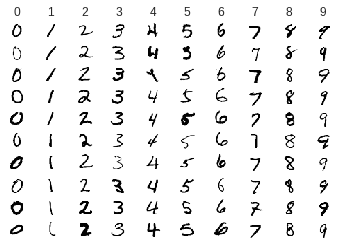

In [265]:
n_samples = 10
n_classes = 10
for number in range(n_classes):
  samples = X_train[y_train==number][:n_samples]
  for sample_idx in range(n_samples):
    index = number + sample_idx * n_classes + 1
    fig = plt.subplot(n_samples,n_classes, index)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.imshow(samples[sample_idx].reshape(28,28))
    if sample_idx == 0: 
      plt.title("{}".format(number))

## Part 2: One Layer Feed-Forward Neural Network

In [0]:
def softmax(x):
  exp = np.exp(x)
  return exp / exp.sum(axis=0)

def linear(W, b, X):
    return W.T.dot(X) + b
  
def forward(W, b, X):
  out = linear(W, b, X)
  return out

## Part 3: Vectorized Cost Function

In [0]:
def compute_cost(W, B, X, Y):
  p = forward(W, B, X)
  return -np.sum(Y * np.log(p))

def gradient(W, B, X, Y):
  p = forward(W, B, X)
  difference = p - Y
  grad_b = np.sum(difference, axis=1, keepdims=True)
  grad_w = np.matmul(difference, X.T)
  return grad_w, grad_b

def initialize_network(w_shape, b_shape):
  n = w_shape[0]
  W = np.random.normal(loc=0, scale=np.sqrt(2.0/n), size=w_shape)
  B = np.random.normal(loc=0, scale=np.sqrt(2.0/n), size=b_shape)
  return W, B

In [0]:
def finite_difference(W, B, X, Y, h):
  w_coords = [[7, 254], [5, 305], [8, 374], [3, 103], [4, 611], [4, 276]]   # randomly chosen coordinates for w_i,j
  b_coords = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0]]
  
  grad_w, grad_b = gradient(W, B, X, Y)
  
  print "W Gradient Calculations"
  for coords in w_coords:
    c0, c1 = coords[0], coords[1]
    print "  Cost at W_{},{}".format(c0, c1)
    print "    Gradient:    {}".format(grad_w[c0, c1])
    W_copy = W.copy()
    W_copy[c0, c1] += h
    derivative = (compute_cost(W_copy, B, X, Y) - compute_cost(W, B, X, Y))/h
    print "    Finite diff: {}".format(derivative)
  
  print "\nB Gradient Calculations"
  for coords in b_coords:
    c0, c1 = coords[0], coords[1]
    print "  Cost at B_{},{}".format(c0, c1)
    print "    Gradient:    {}".format(grad_b[c0, c1])
    B_copy = B.copy()
    B_copy[c0, c1] += h
    derivative = (compute_cost(W, B_copy, X, Y) - compute_cost(W, B, X, Y))/h
    print "    Finite diff: {}".format(derivative)  

def gradient_checking(W, B, X, Y):
  h = 0.00001
  finite_difference(W, B, X, Y, h)

In [0]:
def gradient_descent(W, B, X, Y, learning_rate=0.000001, max_iters=5000):
  cost_history = []
  for i in range(max_iters):
    cost = compute_cost(W, B, X, Y)
    print "Cost: {}".format(cost)
    cost_history.append(cost)
    grad_W, grad_B = gradient(W, B, X, Y)
    W = W - grad_W * learning_rate
    B = B - grad_B * learning_rate
  print cost_history
    
  

In [277]:
np.random.seed(411)
W, B = initialize_network((10, n), (10, 1))
gradient_checking(W, B, X_train.T, y_train_one_hot.T)
#gradient_descent(W, B, X_train.T, y_train_one_hot.T)
'''
cost = compute_cost(W, B, X_train.T, y_train_one_hot.T)
print cost
grad_W, grad_B = gradient(W, B, X_train.T, y_train_one_hot.T)
W = W - grad_W * 0.00001
cost = compute_cost(W, B, X_train.T, y_train_one_hot.T)
print cost
'''



W Gradient Calculations
  Cost at W_7,254
    Gradient:    -77.0332983644
    Finite diff: -77.0332873799
  Cost at W_5,305
    Gradient:    -76.2021893538
    Finite diff: -76.2021401897
  Cost at W_8,374
    Gradient:    -490.83091431
    Finite diff: -490.828533657
  Cost at W_3,103
    Gradient:    183.23367201
    Finite diff: 183.234032011
  Cost at W_4,611
    Gradient:    14.8585889386
    Finite diff: 14.8586754221
  Cost at W_4,276
    Gradient:    -52.1867736413
    Finite diff: -52.1867768839

B Gradient Calculations
  Cost at B_0,0
    Gradient:    -4099.90252272
    Finite diff: -4099.90129992
  Cost at B_1,0
    Gradient:    2089.58429062
    Finite diff: 2089.60092859
  Cost at B_2,0
    Gradient:    -3922.78677839
    Finite diff: -3922.78517247
  Cost at B_3,0
    Gradient:    142.263351159
    Finite diff: 142.274500104
  Cost at B_4,0
    Gradient:    -3452.99373695
    Finite diff: -3452.99052424
  Cost at B_5,0
    Gradient:    2785.2499052
    Finite diff: 2785.2

'\ncost = compute_cost(W, B, X_train.T, y_train_one_hot.T)\nprint cost\ngrad_W, grad_B = gradient(W, B, X_train.T, y_train_one_hot.T)\nW = W - grad_W * 0.00001\ncost = compute_cost(W, B, X_train.T, y_train_one_hot.T)\nprint cost\n'

## Part 4: Vanilla Gradient Descent

In [0]:
def cross_entropy_loss(outputs, targets):
    probs = softmax(outputs).T
    loss = np.mean(np.sum(-targets*np.log(probs), axis=1))
    return loss
  
def xentropy_gradient(inputs, outputs, targets):
    probs = softmax(outputs).T
    gradients = np.matmul(inputs, (probs - targets))
    return gradients

In [0]:
# Minibatch creation
batch_size = 64
nb_of_batches = X_train.shape[0] / batch_size  
batches = zip(
    np.array_split(X_train, nb_of_batches, axis=0), 
    np.array_split(target_train, nb_of_batches, axis=0)) 

In [0]:
weights = np.random.randn(28*28, 10) / 28
biases = np.zeros((10,1))

In [0]:
minibatch_costs = []
training_costs = []
validation_costs = []

n_epochs = 100
learning_rate = 0.005

for epoch in range(n_epochs):
    for X, y in batches: 
        outputs = forward(weights, biases, X.T)
        gradients = xentropy_gradient(X.T, outputs, y)
        weights -= learning_rate * gradients
    
    outputs = forward(weights, biases, X_train.T)
    train_cost = cross_entropy_loss(outputs, target_train)
    training_costs.append(train_cost)

    outputs = forward(weights, biases, X_valid.T)
    validation_cost = cross_entropy_loss(outputs, target_valid)
    validation_costs.append(validation_cost)
    
    if len(validation_costs) > 3:
        if validation_costs[-1] >= validation_costs[-2] >= validation_costs[-3]:
            learning_rate*=5e-1

In [0]:
def plt_loss():    
    plt.figure(figsize=(12,9))
    plt.plot(range(epoch+1), training_costs)
    plt.plot(range(epoch+1), validation_costs)
    plt.plot(range(len(minibatch_costs)), minibatch_costs)
    plt.title("Cross Entropy Loss Learning Curve \n batch_size={}, \
    lr={}".format(batch_size, learning_rate))  
    plt.ylabel("Loss")
    #plt.ylim(1e-3, 5e-2)
    plt.xlabel("Epoch")
    plt.legend(["training", "validation"])
    plt.savefig("loss-bs{}-lr{}.jpg".format(batch_size, learning_rate), dpi=300, bbox_inches='tight')

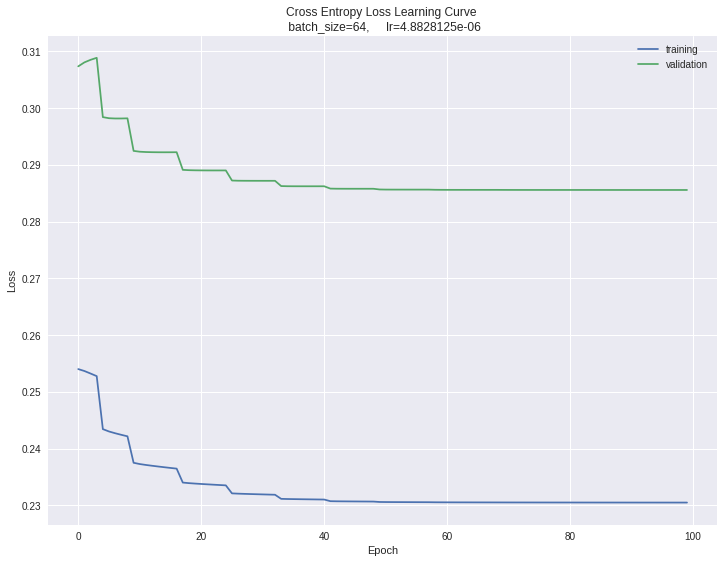

In [311]:
plt_loss()

(784, 10)


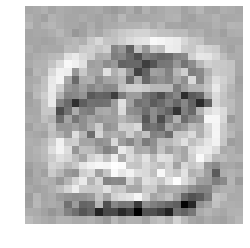

In [309]:
print weights.shape

plot_weightings(weights[:, 9])

def plot_weightings(theta):
    theta = theta.reshape(28, 28)
    imgplot = plt.imshow(theta)
    plt.axis('off')
    plt.show()

## Part 5: Momentum Gradient Descent

In [0]:
W = np.random.randn(28*28, 10) / 28
b = np.zeros((10,1))

In [0]:
minibatch_costs = []
training_costs = []
validation_costs = []

n_epochs = 100
learning_rate = 0.005
beta = 0.9

v = 0

for epoch in range(n_epochs):
    for X, y in batches: 
        outputs = forward(W, b, X.T)
        gradients = xentropy_gradient(X.T, outputs, y)
        v = beta * v + (1 - beta) * gradients
        W -= learning_rate * v
    
    outputs = forward(W, b, X_train.T)
    train_cost = cross_entropy_loss(outputs, target_train)
    training_costs.append(train_cost)

    outputs = forward(W, b, X_valid.T)
    validation_cost = cross_entropy_loss(outputs, target_valid)
    validation_costs.append(validation_cost)
    
    if len(validation_costs) > 3:
        if validation_costs[-1] >= validation_costs[-2] >= validation_costs[-3]:
            learning_rate*=5e-1

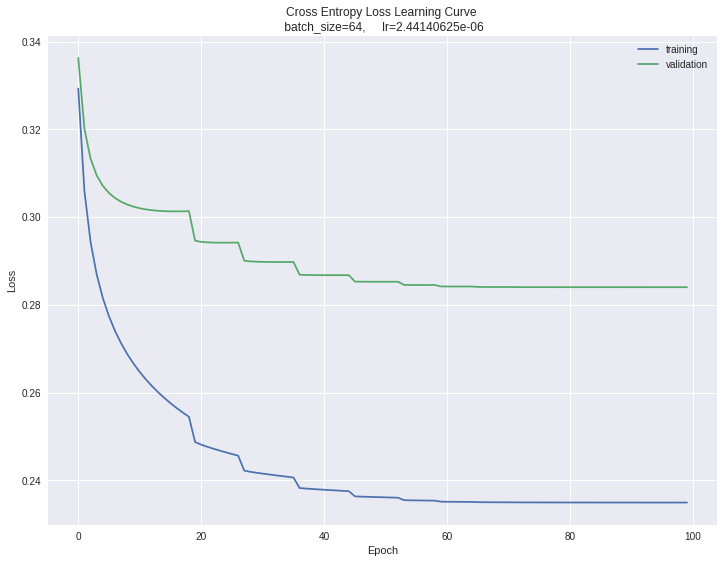

In [382]:
plt_loss()

## Part 6: Comparing Momentum and Vanilla Gradient Descent

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_soft_max(w1_lim, w2_lim):
    w1 = np.linspace(w1_lim[0], w1_lim[1])
    w2 = np.linspace(w2_lim[0], w2_lim[1])
    w = np.meshgrid()
    

##Part 7: Computational Complexity

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

In [0]:
# Un-vectorized operations

def get_row(matrix, row):
    return matrix[row]
 
 
def get_column(matrix, column_number):
    column = []
    for i in range(len(matrix)):
        column.append(matrix[i][column_number])
    return column
 
 
def dot_product(vector_one, vector_two):
    total = 0
    if len(vector_one) != len(vector_two):
        return total
    for i in range(len(vector_one)):
        product = vector_one[i] * vector_two[i]
        total += product
    return total
 
 
def mm(matrix_one, matrix_two):
    m_rows = len(matrix_one)
    p_columns = len(matrix_two[0])
    
    result = []
    for i in range(m_rows):
 
        row_result = []
 
        for j in range(p_columns):
            row = get_row(matrix_one, i)
            column = get_column(matrix_two, j)
            product = dot_product(row, column)
 
            row_result.append(product)
 
        result.append(row_result)
    return np.array(result)
  
def sub(matrix_one, matrix_two):
  result = np.zeros_like(matrix_one)
  for i in range(matrix_one.shape[0]):
    for j in range(matrix_one.shape[1]):
      result[i,j] = matrix_one[i,j] - matrix_two[i,j]
  return result

def scalar_mult(matrix, scalar):
  result = np.zeros_like(matrix)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      result[i,j] = scalar * matrix[i,j]
  return result

In [26]:
timeit.timeit('mm(weights1, input)', setup="from __main__ import mm; \
                                            import numpy as np; \
                                            weights1 = np.random.randn(32, 32); \
                                            input = np.random.randn(32, 1)", number=1000)

0.6384150981903076

In [27]:
timeit.timeit('np.matmul(weights1, input)', setup="import numpy as np; \
                                                   weights1 = np.random.randn(32, 32); \
                                                   input = np.random.randn(32, 1)", number=1000)

0.0008008480072021484

In [0]:
def forward(input, weights1, weights2):
  hidden = mm(weights1.T, input)
  output = mm(weights2.T, hidden)
  return output

def loss_gradient(input, weights, target, pred, wrt='weights'):
    n_samples = input.shape[0]
    residual = pred - target
    if wrt == 'weights':
      grad = (1.0/n_samples)*mm(input, residual.T)
    elif wrt == 'input':
      grad = (1.0/n_samples)*mm(weights, residual)
    return grad

def hidden_gradient(input, weights, wrt='weights'):
    grad = []
    if wrt == 'weights':
        for i in range(weights.shape[1]):
          grad.append(input)
    elif wrt == 'input':
        grad = weights
    return grad  
  
def update_weights(weights, weights_gradient, learning_rate):
    weights = sub(weights, scalar_mult(weights_gradient, learning_rate))
    return weights

In [0]:
def nonvectorized_experiment(input_size, n_hidden):
    import numpy as np
    # Non-Vectorized Matrix Operations
    def get_row(matrix, row):
        return matrix[row]


    def get_column(matrix, column_number):
        column = []
        for i in range(len(matrix)):
            column.append(matrix[i][column_number])
        return column


    def dot_product(vector_one, vector_two):
        total = 0
        if len(vector_one) != len(vector_two):
            return total
        for i in range(len(vector_one)):
            product = vector_one[i] * vector_two[i]
            total += product
        return total


    def mm(matrix_one, matrix_two):
        m_rows = len(matrix_one)
        p_columns = len(matrix_two[0])

        result = []
        for i in range(m_rows):

            row_result = []

            for j in range(p_columns):
                row = get_row(matrix_one, i)
                column = get_column(matrix_two, j)
                product = dot_product(row, column)

                row_result.append(product)

            result.append(row_result)
        return np.array(result)

    def sub(matrix_one, matrix_two):
      result = np.zeros_like(matrix_one)
      for i in range(matrix_one.shape[0]):
        for j in range(matrix_one.shape[1]):
          result[i,j] = matrix_one[i,j] - matrix_two[i,j]
      return result

    def scalar_mult(matrix, scalar):
      result = np.zeros_like(matrix)
      for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
          result[i,j] = scalar * matrix[i,j]
      return result
    
    
    # Helper Functions for Gradient Updates
    
    def forward(input, weights1, weights2):
      hidden = mm(weights1.T, input)
      output = mm(weights2.T, hidden)
      return output

    def loss_gradient(input, weights, target, pred, wrt='weights'):
        n_samples = input.shape[0]
        residual = pred - target
        if wrt == 'weights':
          grad = (1.0/n_samples)*mm(input, residual.T)
        elif wrt == 'input':
          grad = (1.0/n_samples)*mm(weights, residual)
        return grad

    def hidden_gradient(input, weights, wrt='weights'):
        grad = []
        if wrt == 'weights':
            for i in range(weights.shape[1]):
              grad.append(input)
        elif wrt == 'input':
            grad = weights
        return grad  

    def update_weights(weights, weights_gradient, learning_rate):
        weights = sub(weights, scalar_mult(weights_gradient, learning_rate))
        return weights
    
    input = np.random.randn(input_size,1)
    weights1 = np.random.randn(input_size,n_hidden)
    weights2 = np.random.randn(n_hidden,n_hidden)
    weightsOut = np.random.randn(n_hidden,8)
    target = np.random.randn(8,1)
    learning_rate = 1e-3

    hidden1 = mm(weights1.T, input)
    hidden2 = mm(weights2.T, hidden1)
    output = mm(weightsOut.T, hidden2)

    weightsOut_grad = loss_gradient(hidden2, weightsOut, target, output, wrt='weights')
    weightsOut = update_weights(weightsOut, weightsOut_grad, learning_rate)

    weights2_grad = mm(hidden1, loss_gradient(hidden2, weightsOut, target, output, wrt='input').T)
    weights2 = update_weights(weights2, weights2_grad, learning_rate)

    weights1_grad = mm(input, mm(hidden_gradient(hidden1, weights2, wrt='input'), loss_gradient(hidden2, weightsOut, target, output, wrt='input')).T)
    weights1 = update_weights(weights1, weights1_grad, learning_rate)

In [0]:
def vectorized_experiment(input_size, n_hidden):
    import numpy as np
    
    # Helper Functions for Gradient Updates
    
    def forward(input, weights1, weights2):
      hidden = np.matmul(weights1.T, input)
      output = np.matmul(weights2.T, hidden)
      return output

    def loss_gradient(input, weights, target, pred, wrt='weights'):
        n_samples = input.shape[0]
        residual = pred - target
        if wrt == 'weights':
          grad = (1.0/n_samples)*np.matmul(input, residual.T)
        elif wrt == 'input':
          grad = (1.0/n_samples)*np.matmul(weights, residual)
        return grad

    def hidden_gradient(input, weights, wrt='weights'):
        grad = []
        if wrt == 'weights':
            for i in range(weights.shape[1]):
              grad.append(input)
        elif wrt == 'input':
            grad = weights
        return grad  

    def update_weights(weights, weights_gradient, learning_rate):
        weights = weights - learning_rate*weights_gradient
        return weights
    
    input = np.random.randn(input_size,1)
    weights1 = np.random.randn(input_size,n_hidden)
    weights2 = np.random.randn(n_hidden,n_hidden)
    weightsOut = np.random.randn(n_hidden,8)
    target = np.random.randn(8,1)
    learning_rate = 1e-3

    hidden1 = np.matmul(weights1.T, input)
    hidden2 = np.matmul(weights2.T, hidden1)
    output = np.matmul(weightsOut.T, hidden2)

    weightsOut_grad = loss_gradient(hidden2, weightsOut, target, output, wrt='weights')
    weightsOut = update_weights(weightsOut, weightsOut_grad, learning_rate)
    
    
    hidden2_grad = loss_gradient(hidden2, weightsOut, target, output, wrt='input')
    weights2_grad = np.matmul(hidden1, hidden2_grad.T)
    weights2 = update_weights(weights2, weights2_grad, learning_rate)
    
    hidden1_grad = hidden_gradient(hidden1, weights2, wrt='input')
    weights1_grad = np.matmul(input, np.matmul(hidden1_grad, hidden2_grad).T)
    weights1 = update_weights(weights1, weights1_grad, learning_rate)

In [0]:
input_nonvector_times = []
n_trials=1000

for input_size in range(1, 250, 10):
    time = timeit.timeit('nonvectorized_experiment(input_size, n_hidden)', setup='from __main__ import nonvectorized_experiment; input_size={}; n_hidden=8'.format(input_size), number=n_trials)
    avg_time = time/n_trials
    input_nonvector_times.append(avg_time)

In [0]:
input_vector_times = []
n_trials=1000

for input_size in range(1, 250, 10):
    time = timeit.timeit('vectorized_experiment(input_size, n_hidden)', setup='from __main__ import vectorized_experiment; input_size={}; n_hidden=8'.format(input_size), number=n_trials)
    avg_time = time/n_trials
    input_vector_times.append(avg_time)

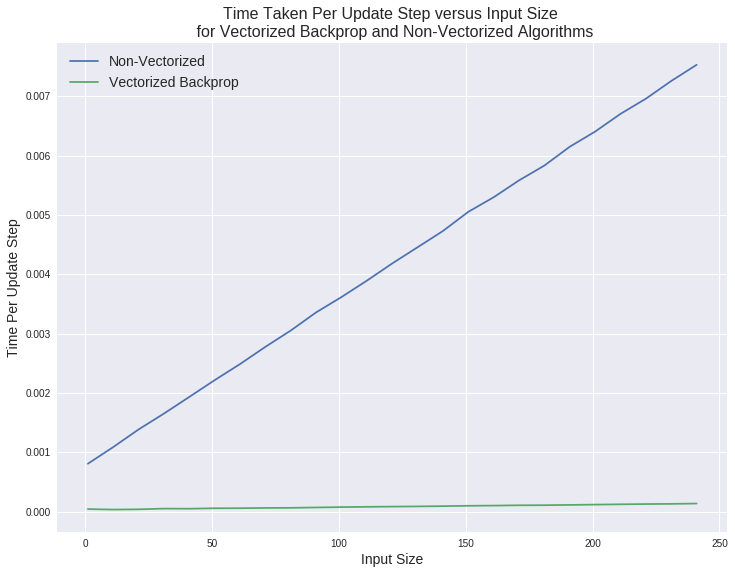

In [100]:
plt.figure(figsize=(12,9))
plt.plot(range(1, 250, 10), input_nonvector_times)
plt.plot(range(1, 250, 10), input_vector_times)
plt.xlabel('Input Size', fontsize=14)
plt.ylabel('Time Per Update Step', fontsize=14)
plt.legend(['Non-Vectorized','Vectorized Backprop'], fontsize=14)
plt.title('Time Taken Per Update Step versus Input Size \n for Vectorized Backprop and Non-Vectorized Algorithms', fontsize=16)
plt.savefig('input-complexity.jpg', dpi=300, bbox_inches="tight")

In [0]:
hidden_nonvector_times = []
n_trials=1000

for n_hidden in range(1, 50, 2):
    time = timeit.timeit('nonvectorized_experiment(input_size, n_hidden)', setup='from __main__ import nonvectorized_experiment; input_size=8; n_hidden={}'.format(n_hidden), number=n_trials)
    avg_time = time/n_trials
    hidden_nonvector_times.append(avg_time)

In [0]:
hidden_vector_times = []
n_trials=1000

for n_hidden in range(1, 50, 2):
    time = timeit.timeit('vectorized_experiment(input_size, n_hidden)', setup='from __main__ import vectorized_experiment; input_size=8; n_hidden={}'.format(n_hidden), number=n_trials)
    avg_time = time/n_trials
    hidden_vector_times.append(avg_time)

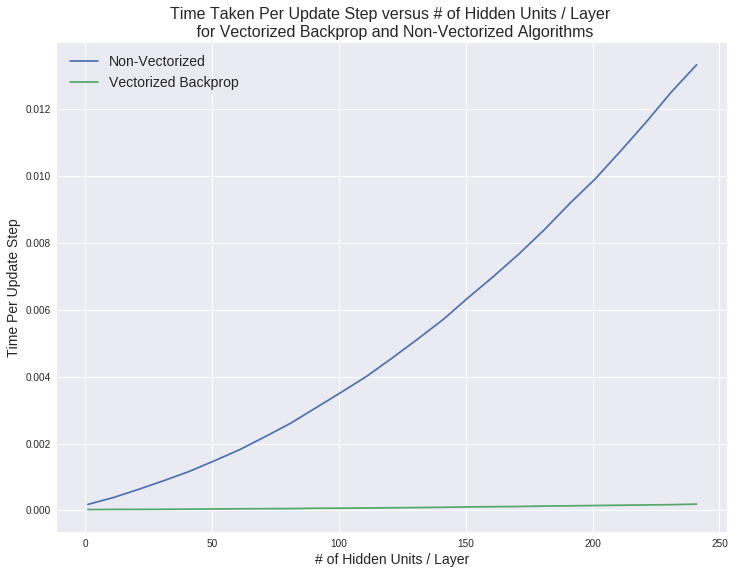

In [116]:
plt.figure(figsize=(12,9))
plt.plot(range(1, 250, 10), hidden_nonvector_times)
plt.plot(range(1, 250, 10), hidden_vector_times)
plt.xlabel('# of Hidden Units / Layer', fontsize=14)
plt.ylabel('Time Per Update Step', fontsize=14)
plt.legend(['Non-Vectorized','Vectorized Backprop'], fontsize=14)
plt.title('Time Taken Per Update Step versus # of Hidden Units / Layer \n for Vectorized Backprop and Non-Vectorized Algorithms', fontsize=16)
plt.savefig('hidden-complexity.jpg', dpi=300, bbox_inches="tight")

## Part 8: PyTorch Neural Network

In [3]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp27-cp27mu-linux_x86_64.whl 
!pip install torchvision 
!pip install pillow==4.0.0

    69% |██████████████████████▎         | 345.5MB 13.5MB/s eta 0:00:12

    100% |████████████████████████████████| 496.9MB 34.7MB/s 
    100% |████████████████████████████████| 51kB 2.8MB/s 
    100% |████████████████████████████████| 5.9MB 197kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 208kB/s 
  Found existing installation: Pillow 5.0.0
    Uninstalling Pillow-5.0.0:
      Successfully uninstalled Pillow-5.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
from imageio import imread, imsave
import urllib2
import sys
import os
import hashlib
from PIL import Image
%matplotlib inline

use_gpu = torch.cuda.is_available()
if use_gpu:
    FloatTensor = torch.cuda.FloatTensor

### Dataset Class
To use the Pytorch data loader system.

In [0]:
import torchvision.transforms as T
from imageio.core.util import asarray
import imageio
from torch.utils.data.dataset import Dataset

class FacesDataset(Dataset):
    def __init__(self, csv_file, root_dir, transforms):
        self.faces_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transforms = transforms
        
    def __getitem__(self, index):
        filename = self.faces_df.iloc[index, 0]
        img = imread(os.path.join(self.root_dir, filename))
        label = self.faces_df.iloc[index, 1]
        
        if self.transforms:
            img = self.transforms(img)
            
        return (img, label)
    
    def __len__(self):
        return len(self.faces_df)
  

In [0]:
def train_test_split(csv_file, root_dir, ratio):
    faces_df = pd.read_csv(csv_file).sample(frac=1).reset_index(drop=True)
    n_samples = len(faces_df)
    n_train = int(n_samples * ratio)
    train_df = faces_df.iloc[:n_train, :]
    test_df = faces_df.iloc[n_train:, :]
    return train_df, test_df

The following code splits the data into 3 sets: training, validation and testing. It uses a ratio of 0.85, which gives 21 (per actor) to test and then about 17 (per actor) to validation (since it is the train set that gets split), leaving about 101 images (per actor) for training. Note: I expect poor performance because neural networks require a lot of data to generalize properly due to their higher capacity. 

In [0]:
root_dir = '/media/logan/Shared/LocalDatasets/faces/'
csv_file = 'faces.csv'

train_df, test_df = train_test_split(os.path.join(root_dir, csv_file), 
                                     root_dir, ratio=0.85)
print train_df.head()
train_df.to_csv(os.path.join(root_dir, 'train.csv'), index=False)
test_df.to_csv(os.path.join(root_dir, 'test.csv'), index=False)

train_df, valid_df = train_test_split(os.path.join(root_dir, 'train.csv'), 
                                      root_dir, ratio=0.85)
train_df.to_csv(os.path.join(root_dir, 'train.csv'), index=False)
valid_df.to_csv(os.path.join(root_dir, 'valid.csv'), index=False)

The following is the activation function used. The swish activation function was determined to be the optimal activation function by a group at Google Brain [[article](https://arxiv.org/abs/1710.05941)]. They used reinforcement learning search techniques to find this function and found it outperformed ReLU the large majority of the time. Instead of wasting time testing this hypothesis, we will trust the very smart people at Google Brain and use this activation function in our small network.

In [0]:
class Swish(nn.Module):
  def __init__(self, beta=1.0):
    super(Swish, self).__init__()
    self.beta = beta
  
  def forward(self, x):
    return x * sigmoid(self.beta * x)

The following code is to set up hyperparameter experiments. The optimal parameters for our network was 256 hidden units on an image size of 32x32 and a batchsize of 64. The weights are of course initialized using the He method. The best initial learning rate was 0.01 with a scheduler of halving the learning rate everytime the validation loss was not improving steadily. The data preprocessing was done slightly different for training and test sets. Both sets were resized to the appropriate dimensions and grayscaled. The training however also included random small rotations and color jitters to help the model generalize and artifically inflate the dataset. Under this our model (in about 175 epochs) achieved a training accuracy and loss of 94.4% and 0.00683 and a validation accuracy and loss of 88.0% and 0.00925 respectively. It received an astounding 96.4% on the test set and a 0.00797 loss. The accuracy I predict must be due to chance, since the loss is greater than that of the training set.

In [0]:
def evaluate(model, data_loader):
    running_loss = 0
    total = 0
    correct = 0
    model.eval()
    for images, labels in data_loader:
        if use_gpu:
            images, labels = images.cuda(), labels.cuda()
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, img_size*img_size))
        
        outputs = model(images)
        loss = criterion(outputs, Variable(labels))
        running_loss += loss
        
        _, predicted = torch.max(outputs.data, 1)
        total += float(labels.size(0))
        correct += (predicted == labels).sum()
        
    avg_loss = running_loss / total
    accuracy = 100 * correct / total
    return (avg_loss, accuracy)

In [0]:
def plt_accuracy():
    plt.figure(figsize=(12,9))
    plt.plot(range(epoch), train_metrics_record[:,1])
    plt.plot(range(epoch), valid_metrics_record[:,1])
    plt.title("Accuracy Learning Curve \n batch_size={}, \
n_hidden={}, img_size={}, lr={}".format(batch_size, n_hidden, img_size, learning_rate))  
    plt.ylabel("Accuracy")
    plt.ylim(0, 100)
    plt.xlabel("Epoch")
    plt.xlim(0, 200)
    plt.legend(["training", "validation"])
    plt.savefig("figures/accuracy-bs{}-h{}-is{}-lr{}.jpg".format(batch_size, n_hidden, img_size, learning_rate), dpi=300, bbox_inches='tight')

In [0]:
def plt_loss():    
    plt.figure(figsize=(12,9))
    plt.plot(range(epoch), train_metrics_record[:,0])
    plt.plot(range(epoch), valid_metrics_record[:,0])
    plt.title("Cross Entropy Loss Learning Curve \n batch_size={}, \
n_hidden={}, img_size={}, lr={}".format(batch_size, n_hidden, img_size, learning_rate))  
    plt.ylabel("Loss")
    #plt.ylim(1e-3, 5e-2)
    plt.xlabel("Epoch")
    plt.xlim(0,200)
    plt.legend(["training", "validation"])
    plt.savefig("figures/loss-bs{}-h{}-is{}-lr{}.jpg".format(batch_size, n_hidden, img_size, learning_rate), dpi=300, bbox_inches='tight')

In [0]:
epochs_per_eval = 1
n_epochs = 300
patience = 30

results_file = 'results.txt'
n_hiddens = [256]
img_sizes = [32]
batch_sizes = [64]
learning_rates = [1e-2]

for n_hidden in n_hiddens:
    for img_size in img_sizes:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                
                # Define the Data Preprocessing
                brightness = 0.05
                contrast = 0.05

                train_transforms = T.Compose([
                    T.ToPILImage(), 
                    T.Grayscale(num_output_channels=1),
                    T.Resize(img_size),
                    T.ColorJitter(brightness, contrast),
                    T.RandomRotation(5),
                    T.ToTensor()
                ])

                test_transforms = T.Compose([
                    T.ToPILImage(), 
                    T.Resize(img_size),
                    T.Grayscale(num_output_channels=1),
                    T.ToTensor()
                ])
                
                # Create the Datasets
    
                train_dataset = FacesDataset(csv_file=os.path.join(root_dir, 'train.csv'), 
                             root_dir=root_dir, transforms=train_transforms)
                valid_dataset = FacesDataset(csv_file=os.path.join(root_dir, 'valid.csv'), 
                                             root_dir=root_dir, transforms=test_transforms)
            
                # Create the Batch/Data Loaders
                
                train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                            shuffle=True)
                valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, 
                                          batch_size=batch_size, 
                                            shuffle=False)
                

                
                #Define the Model
                D_in = img_size * img_size
                D_out = 6
                model = nn.Sequential(
                        nn.Linear(D_in, n_hidden), 
                        nn.Dropout(inplace=True, p=0.3),
                        Swish(),
                        nn.Linear(n_hidden, D_out))
                
                if use_gpu:
                    model.cuda()
                
                # Loss and Optimizer
                criterion = nn.CrossEntropyLoss()  
                optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, gamma=0.5, step_size=50)
                
                # Train the Model
                epoch = 0
                train_metrics_record = []
                valid_metrics_record = []
                evals_since_last_best = 0
                best_loss = np.infty
                best_accuracy = 0.0
                while epoch < n_epochs:
                    model.train()
                    for images, labels in train_loader:  
                        if use_gpu:
                            images, labels = images.cuda(), labels.cuda()
                        # Convert torch tensor to Variable
                        images = Variable(images.view(-1, img_size*img_size))
                        # Forward + Backward + Optimize
                        optimizer.zero_grad()  # zero the gradient buffer
                        outputs = model(images)
                        loss = criterion(outputs, Variable(labels))
                        loss.backward()
                        optimizer.step()

                    epoch += 1
                    
                    
                    if epoch%epochs_per_eval == 0:
                        train_metrics = np.array(evaluate(model, train_loader)).astype(float)
                        train_metrics_record.append(train_metrics)

                        valid_metrics = np.array(evaluate(model, valid_loader)).astype(float)
                        valid_metrics_record.append(valid_metrics)

                        if valid_metrics[0] < best_loss:
                            evals_since_last_best = 0
                            best_loss = valid_metrics[0]
                            best_accuracy = valid_metrics[1]
                            best_model = model
                        else:
                            evals_since_last_best += 1
                        if evals_since_last_best > patience:
                            evals_since_last_best = 0
                            scheduler.step()
       
                        print 'Epoch [{}/{}], Train Accuracy: {}, \
Valid Accuracy: {}\nBest Accuracy: {}, Best Loss: {}\n'.format(epoch, n_epochs, 
                                                               train_metrics[1], valid_metrics[1],
                                                              best_accuracy, best_loss)
                header = "\nbatch_size={}, n_hidden={}, img_size={}, lr={}\n".format(batch_size, n_hidden, img_size, learning_rate)
                results = "valid_acc={:3}, valid_loss={}, train_acc={:.3}, train_loss={}\n".format(valid_metrics[1], valid_metrics[0].data, train_metrics[1], train_metrics[0].data)
                with open(results_file, 'a') as rfile:
                    rfile.write(header + results)
                torch.save(model.state_dict(), 'model-bs{}-h{}-is{}-lr{}-acc{:.3}'.format(batch_size, n_hidden, img_size, learning_rate, valid_metrics[1]))
                train_metrics_record = np.array(train_metrics_record)
                valid_metrics_record = np.array(valid_metrics_record)
                plt_accuracy()
                plt_loss()

## Part 9: Visualization
The hidden unit that will be important for determining each actor will have the largest magnitude weight between itself and the particular actor of interest.

In [0]:
neuron = np.abs(model.state_dict()['3.weight'].cpu().numpy()[0, :]).argmax()

In [0]:
img = model.state_dict()['0.weight'].cpu().numpy()[neuron, :].reshape(32, 32)
plt.figure()
plt.imshow(img)
plt.savefig('figures/bracco.jpg', dpi=300, bbox_inches='tight')

## Part 10: Implementing Alexnet

In [0]:
import torchvision
class MyAlexNet(nn.Module):
    def load_weights(self):
        an_builtin = torchvision.models.alexnet(pretrained=True)
        
        features_weight_i = [0, 3, 6, 8, 10]
        for i in features_weight_i:
            self.features[i].weight = an_builtin.features[i].weight
            self.features[i].bias = an_builtin.features[i].bias

    def __init__(self, num_classes=6):
        super(MyAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
#            nn.Conv2d(256, 256, kernel_size=3, padding=1),
#            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 512),
            Swish(),
            nn.Dropout(),
            nn.Linear(512, 128),
            Swish(),
            nn.Linear(128, num_classes),
        )
        
        self.load_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [0]:
def conv_evaluate(model, data_loader):
    running_loss = 0
    total = 0
    correct = 0
    model.eval()
    for images, labels in data_loader:
        if use_gpu:
            images, labels = images.cuda(), labels.cuda()
        
        outputs = model(Variable(images))
        loss = criterion(outputs, Variable(labels))
        running_loss += loss
        
        _, predicted = torch.max(outputs.data, 1)
        total += float(labels.size(0))
        correct += (predicted == labels).sum()
        
    avg_loss = running_loss / total
    accuracy = 100 * correct / total
    return (avg_loss, accuracy)

In [0]:
def conv_plt_loss(best_loss):    
    plt.figure(figsize=(12,9))
    plt.plot(range(epoch), train_metrics_record[:,0])
    plt.plot(range(epoch), valid_metrics_record[:,0])
    plt.title("Cross Entropy Loss Learning Curve \n batch_size={}, \
img_size={}, lr={}".format(batch_size, img_size, learning_rate), fontsize=16)  
    plt.ylabel("Loss", fontsize=14)
    #plt.ylim(1e-3, 5e-2)
    plt.xlabel("Epoch", fontsize=14)
    plt.xlim(0,100)
    plt.legend(["training", "validation"])
    plt.savefig("figures/convloss-bs{}-is{}-lr{}-wd{}-loss{:.4}.jpg".format(batch_size, img_size, learning_rate, weight_decay, best_loss), dpi=300, bbox_inches='tight')

In [0]:
def conv_plt_accuracy(best_accuracy):    
    plt.figure(figsize=(12,9))
    plt.plot(range(epoch), train_metrics_record[:,1])
    plt.plot(range(epoch), valid_metrics_record[:,1])
    plt.title("Accuracy Learning Curve \n batch_size={}, \
img_size={}, lr={}".format(batch_size, img_size, learning_rate), fontsize=16)  
    plt.ylabel("Accuracy", fontsize=14)
    plt.ylim(0,100)
    plt.xlabel("Epoch", fontsize=14)
    plt.xlim(0,100)
    plt.legend(["training", "validation"])
    plt.savefig("figures/convloss-bs{}-is{}-lr{}-wd{}-acc{:.3}.jpg".format(batch_size, img_size, learning_rate, weight_decay, best_accuracy), dpi=300, bbox_inches='tight')

In [0]:
img_size = 227
batch_size = 32

# Define the Data Preprocessing
brightness = 0.1
contrast = 0.1

train_transforms = T.Compose([
    T.ToPILImage(), 
    T.Resize(img_size),
    T.ColorJitter(brightness, contrast),
    T.RandomRotation(20, resample=Image.BILINEAR),
    T.ToTensor()
])

test_transforms = T.Compose([
    T.ToPILImage(), 
    T.Resize(img_size),
    T.ToTensor()
])

# Create the Datasets

train_dataset = FacesDataset(csv_file=os.path.join(root_dir, 'train.csv'), 
             root_dir=root_dir, transforms=train_transforms)
valid_dataset = FacesDataset(csv_file=os.path.join(root_dir, 'valid.csv'), 
                             root_dir=root_dir, transforms=test_transforms)

# Create the Batch/Data Loaders

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                           batch_size=batch_size, 
                            shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, 
                          batch_size=batch_size, 
                            shuffle=False)

In [0]:
epochs_per_eval = 1
n_epochs = 100
patience = 50
weight_decay = 1e-8
 #Define the Model

model = MyAlexNet()

if use_gpu:
    model.cuda()
    
learning_rate = 1e-3
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, gamma=0.5, step_size=20)

# Train the Model
epoch = 0
train_metrics_record = []
valid_metrics_record = []
evals_since_last_best = 0
best_loss = np.infty
best_accuracy = 0.0

while epoch < n_epochs:
    model.train()
    for images, labels in train_loader:  
        if use_gpu:
            images, labels = images.cuda(), labels.cuda()
        # Convert torch tensor to Variable
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = model(Variable(images))
        loss = criterion(outputs, Variable(labels))
        loss.backward()
        optimizer.step()

    epoch += 1
    scheduler.step()

    if epoch%epochs_per_eval == 0:
        train_metrics = np.array(conv_evaluate(model, train_loader)).astype(float)
        train_metrics_record.append(train_metrics)

        valid_metrics = np.array(conv_evaluate(model, valid_loader)).astype(float)
        valid_metrics_record.append(valid_metrics)

        if valid_metrics[0] < best_loss:
            evals_since_last_best = 0
            best_loss = valid_metrics[0]
            best_accuracy = valid_metrics[1]
            best_model = model
            
        else:
            evals_since_last_best += 1
            
        if evals_since_last_best > patience:
            model = best_model
            break
            
            
        print 'Epoch [{}/{}], Train Accuracy: {}, \
Valid Accuracy: {}\nBest Accuracy: {}, Best Loss: {}\n'.format(epoch, n_epochs, 
                                               train_metrics[1], valid_metrics[1],
                                              best_accuracy, best_loss)

torch.save(model.state_dict(), 'alexmodel-bs{}-lr{}-acc{:.3}-conv5'.format(batch_size, learning_rate, valid_metrics[1]))
train_metrics_record = np.array(train_metrics_record)
valid_metrics_record = np.array(valid_metrics_record)
conv_plt_accuracy(best_accuracy)
conv_plt_loss(best_loss)

In [0]:
print train_metrics_record[32,0], train_metrics_record[32,1]
print valid_metrics_record[32,0], valid_metrics_record[32,1]

In [0]:
test_dataset = FacesDataset(csv_file=os.path.join(root_dir, 'test.csv'), root_dir=root_dir, transforms=test_transforms)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
test_metrics = conv_evaluate(model, test_loader)
print test_metrics

## Downloading Dataset

In [0]:
from scipy import ndimage
def random_augmentation(img):
    rand_rot = np.random.uniform(low = -15.0, high = 15.0)
    augmented_img = ndimage.rotate(img, rand_rot, reshape=False, mode='nearest')

    rand_shift = np.random.uniform(low = -2.0, high = 2.0)
    augmented_img = ndimage.shift(augmented_img, rand_shift, mode='nearest')
    
    rand_blur = np.random.uniform(low = 0.0, high = 0.5)
    augmented_img = ndimage.gaussian_filter(augmented_img, sigma=rand_blur)
    
    return augmented_img

In [0]:
def generate_samples(data, img_dir, n_samples):
    # data is a pandas dataframe
    samples = []
    
    n_existing_samples = data.shape[0]
    n_required_samples = np.max([0, n_samples - n_existing_samples])
    indices = np.random.permutation(range(n_existing_samples))[:n_required_samples]
    
    for i in indices:
        img_filename = data.iloc[i, 0]
        label = data.iloc[i, 1]
        img = imread(os.path.join(img_dir, img_filename))
        sample_filename = label + str(n_existing_samples) + ".jpg"
        
        augmented_img = random_augmentation(img) / 255.0
        imsave(os.path.join(img_dir, sample_filename), augmented_img)
        
        samples.append([sample_filename] + [label])
        n_existing_samples += 1
    
    return pd.DataFrame(samples, columns=list(data))

In [0]:
def create_index_file(destination, actors):
    dataset = pd.DataFrame(columns=["img_name", "label"])
    print list(dataset)
    for label, actor in enumerate(actors):
        name = actor.split()[1].lower()
        actor_data = []
        for i in range(140):
            filename = name + str(i) + '.jpg' 
            actor_data.append([filename] + [label])
        actor_data = pd.DataFrame(actor_data, columns=list(dataset))
        dataset = pd.concat([dataset, actor_data], ignore_index=True)
    dataset.to_csv(os.path.join(destination, 'faces.csv'), index=False)
    return dataset

In [0]:
def download_faces(source, destination, actors):
    dataset = pd.DataFrame(columns=["img_name", "label"])
    if not os.path.exists(destination):
        os.makedirs(destination)
    for actor in actors:
        actor_data = []
        name = actor.split()[1].lower()
        i = 0
        for line in open(source):
            if actor in line:
                parsed_line = [item.rstrip("\n\r") for item in line.split("\t")]
                URL = parsed_line[3]
                # print URL
                # print parsed_line
                
                try:
                    SHA256hash = parsed_line[5]
                except IndexError as error:
                    print("No hash available")
                    continue
                except:
                    print("Unexpected error: ", sys.exc_info()[0])
                    continue                


                filename = name + str(i) + '.jpg'

                # Attempt to open image from url
                try:
                    request = urllib2.urlopen(URL, timeout=10)
                except (urllib2.URLError) as error:
                    print(error)
                    continue
                except:
                    print("Unexpected error: ", sys.exc_info()[0])
                    continue
                try:    
                    filedata = request.read()
                except:
                    print("Unexpected error: ", sys.exc_info()[0])
                    continue

                # Check the SHA256 hash to determine validity and write to file if valid
                if hashlib.sha256(filedata).hexdigest() == SHA256hash:
                    with open(os.path.join(destination, filename), 'wb') as imgfile:
                        try:
                            imgfile.write(filedata)
                        except IOError as error:
                            print(error)
                            continue
                        except:
                            print("Unexpected error: ", sys.exc_info()[0])
                            continue
                else:
                    print("Hashes did not match")
                    continue

                # Sometimes image can be written improperly, so careful opening is required     
                try:
                    img = Image.open(os.path.join(destination, filename)).convert('RGB')
                except IOError as error:
                    print(error)
                    continue
                except:
                    print("Unexpected error: ", sys.exc_info()[0])
                    continue

                else:
                    img.convert('RGB')
                    face_coords = map(int,(parsed_line[4]).split(','))
                    cropped = np.array(img.crop(face_coords))
                    imsave(os.path.join(destination, filename), cropped)
                    actor_data.append([filename] + [name])
                    print(filename)
                    i += 1
        actor_data = pd.DataFrame(actor_data, columns=list(dataset))
        # I want 140 total samples, 120 for training set, and 10 each for validation and test set
        samples = generate_samples(actor_data, destination, 140)
        actor_data = pd.concat([actor_data, samples], ignore_index=True)
        dataset = pd.concat([dataset, actor_data], ignore_index=True)
    dataset.to_csv(os.path.join(destination, 'faces.csv'))
    return dataset